## 12_SWIETOKRZYSKIE_preprocessed.csv

Plik zawiera wyniki oceny odkurzaczy przez kupujących w jednej z sieci sklepów w wojewódźtwie świętokrzyskm.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../Analysis Data/12_SWIETOKRZYSKIE_preprocessed.csv"); df

,days from purchase,brand,age,sex,rating
0,7,Beko,33.0,M,3.0
1,7,Beko,55.0,NaN,3.0
2,10,Beko,50.0,M,2.0
3,11,Tefal,36.0,M,2.5
4,3,Beko,62.0,K,2.5
...,...,...,...,...,...
461,8,Beko,19.0,M,2.5
462,9,Electrolux,50.0,K,3.0
463,9,Beko,NaN,K,2.0
464,5,Tefal,41.0,M,3.0



### days from purchase
Ilość dni, które minęły od zakupu.

,days from purchase
count,466.000000
mean,7.126609
std,2.764417
min,0.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,17.000000


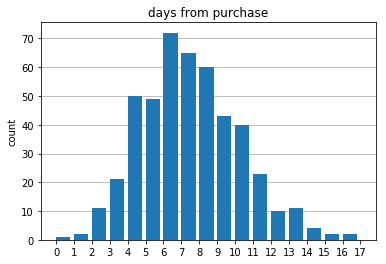

In [37]:
min = df['days from purchase'].min()
max = df['days from purchase'].max()
fig, ax = plt.subplots()
df['days from purchase'].plot(kind='hist', bins=(max - min), title='days from purchase', xticks=[i for i in range(min, max+1)], width=0.8, ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
pd.DataFrame(df['days from purchase'].describe())

### brand
Marka zakupionego odkurzacza.


,brand
count,466
unique,5
top,Beko
freq,323


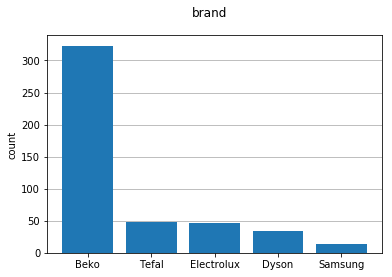

In [38]:
D = df['brand'].value_counts().to_dict()
fig, ax = plt.subplots()
ax.bar(*zip(*D.items()))
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
fig.suptitle('brand')
fig.show();
pd.DataFrame(df['brand'].describe())

### age
Wiek kupującego w latach.


,age
count,418.000000
mean,40.186603
std,9.710367
min,18.000000
25%,33.250000
50%,40.000000
75%,47.000000
max,72.000000


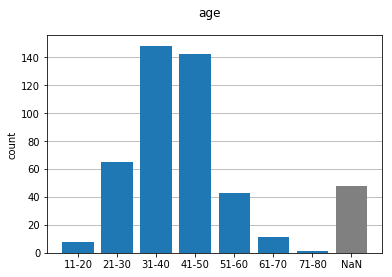

In [39]:
bins = pd.interval_range(10, 80, freq=10)
counts = pd.cut(df["age"], bins).value_counts().to_dict()
counts = {f'{k.left+1}-{k.right}': v for k, v in sorted(counts.items(), key=lambda x: x[0].left)}

fig, ax = plt.subplots()
ax.bar(*zip(*counts.items()))
ax.bar(['NaN'], [df.age.isna().sum()], color='gray')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
fig.suptitle('age')
fig.show()
pd.DataFrame(df['age'].describe())

### sex
Płeć kupującego.
* K - kobieta
* M - mężczyzna

,sex
count,368
unique,2
top,M
freq,238


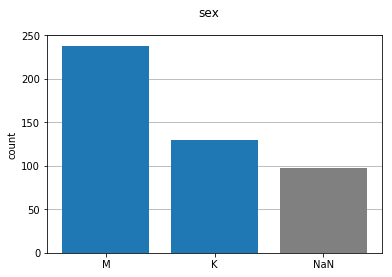

In [40]:
D = df['sex'].value_counts().to_dict()
fig, ax = plt.subplots()
ax.bar(*zip(*D.items()))
ax.bar(['NaN'], [df.sex.isna().sum()], color='gray')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
fig.suptitle('sex')
fig.show()
pd.DataFrame(df['sex'].describe())

### rating
Ocena zakupu w skali od 0 do 5 z różnicą co 0.5.

,rating
count,466.000000
mean,2.413090
std,1.081347
min,0.000000
25%,1.500000
50%,2.500000
75%,3.000000
max,5.000000


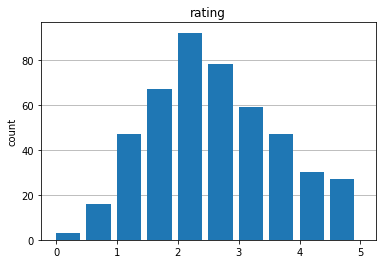

In [41]:
fig, ax = plt.subplots()
df['rating'].plot(kind='hist', bins=10, title='rating', width=0.4, ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
pd.DataFrame(df['rating'].describe())